# File Transfer rates for the LCLS data mover

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
fn = "/reg/data/ana01/temp/wilko/xswap/file_stats_20180129T145017.csv.xz"
d = pd.read_csv(fn)
# d.info()
d.frate /= pow(2,20)
d.fsize /= pow(2,30)

# File Transfer distributions

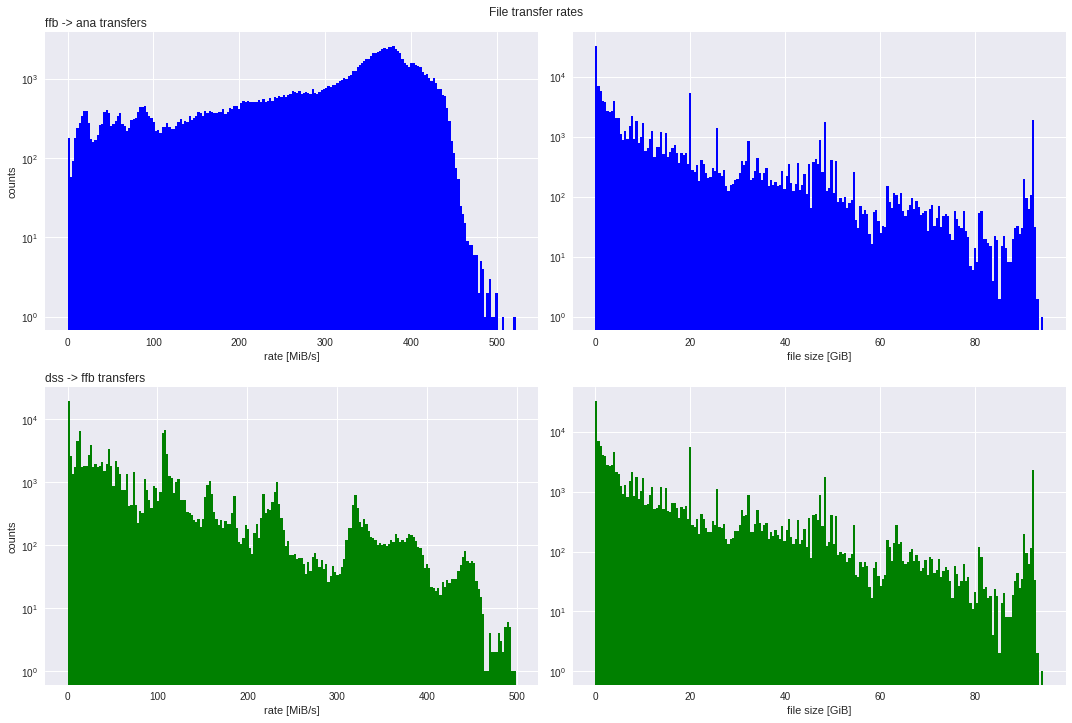

In [3]:

cut_ana = (d.fsize < 200) & (d.ffbtrans == 0)
cut_ffb = (d.fsize < 200) & (d.ffbtrans == 1)

fig = plt.figure(figsize=(15,10))

for n,cut in enumerate((cut_ana, cut_ffb)):    
    ax = fig.add_subplot(2,2,2*n+1)
    if n == 0:
        col='b'
        ax.set_title("ffb -> ana transfers", loc='left')
    else:
        col='g'
        ax.set_title("dss -> ffb transfers", loc='left')
    
    d.loc[ cut ].frate.hist(bins=200, color=col)
    plt.xlabel("rate [MiB/s]")
    plt.ylabel("counts")
    ax.set_yscale("log")

    ax = fig.add_subplot(2,2,2*n+2)
    d.loc[ cut ].fsize.hist(bins=200, color=col)
    plt.xlabel("file size [GiB]")
    ax.set_yscale("log")

plt.suptitle("File transfer rates", y=1)
plt.tight_layout()
#plt.savefig("/reg/neh/home/wilko/a.png")
plt.show()

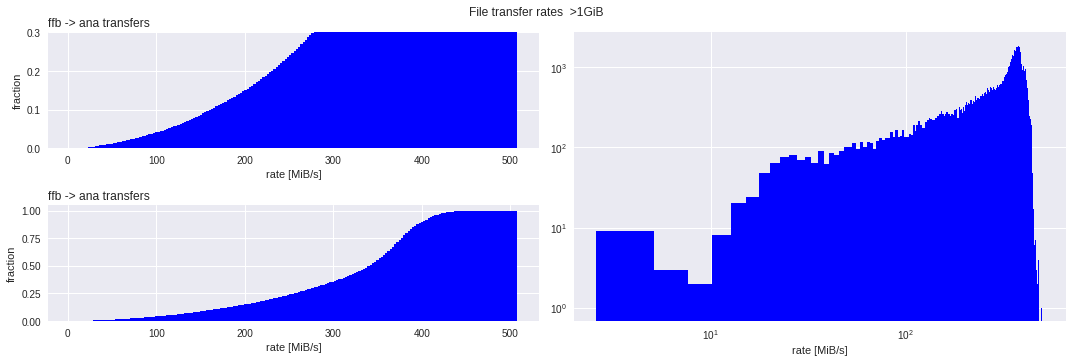

In [5]:
cut_ana = (d.fsize < 200) & (d.fsize > 1) & (d.ffbtrans == 0)

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(2,2,1)
col='b'
ax.set_title("ffb -> ana transfers", loc='left')
    
d.loc[cut_ana].frate.hist(bins=200, color=col, cumulative=True, density=True)
plt.xlabel("rate [MiB/s]")
plt.ylabel("fraction")
ax.set_ylim((0,0.3))

ax = fig.add_subplot(2,2,3)
ax.set_title("ffb -> ana transfers", loc='left')
    
d.loc[cut_ana].frate.hist(bins=200, color=col, cumulative=True, density=True)
plt.xlabel("rate [MiB/s]")
plt.ylabel("fraction")

ax = fig.add_subplot(1,2,2)
d.loc[cut_ana].frate.hist(bins=200, color=col)
plt.xlabel("rate [MiB/s]")
ax.set_xscale("log")
ax.set_yscale("log")

plt.suptitle("File transfer rates  >1GiB", y=1)
plt.tight_layout()
plt.show()

# Compare transfer elapsed time from start/stop and size/rate

The transfer rate and file size are internally calculated by the transfer tool (bbcp). 
The start and stop times are from lines that bbcp prints to the log files and might include
some overhead not directly related to the transfer.

>> tdiff = (fileSize / transferRate) - (stop - start)

In [6]:
d['elap'] = (d.fsize * 1024.0 / d.frate)
d['elapt'] = d.stopt - d.startt
d['tdiff'] = d.elap - d.elapt

In [7]:
d.loc[ d.tdiff < -100 ].head()

,startt,stopt,fsize,frate,ffbtrans,fn,instr,srcquery,trgfs,dmhost,localtrans,srchost,trghost,elap,elapt,tdiff
15315,1.498955e+09,1.499034e+09,10.643896,375.200000,1,e989-r0003-s02-c00.xtc,cxi,daq-cxi-dss03-ana,ffb21,psana203,0,daq-cxi-dss03,psana203,29.049440,79580.0,-79550.950560
94222,1.502128e+09,1.502137e+09,0.021349,0.002344,1,e882-r0047-s02-c00.xtc,sxr,daq-sxr-dss03-ana,ffb11,psana102,0,daq-sxr-dss03,psana102,9327.371419,9467.0,-139.628581
94223,1.502128e+09,1.502137e+09,0.021350,0.002344,1,e882-r0047-s01-c00.xtc,sxr,daq-sxr-dss02-ana,ffb11,psana103,0,daq-sxr-dss02,psana103,9328.125000,9467.0,-138.875000
94224,1.502128e+09,1.502137e+09,0.021357,0.002344,1,e882-r0047-s03-c00.xtc,sxr,daq-sxr-dss04-ana,ffb11,psana102,0,daq-sxr-dss04,psana102,9330.847982,9467.0,-136.152018
94439,1.502143e+09,1.502212e+09,0.136341,0.002051,1,e882-r0052-s00-c00.xtc,sxr,daq-sxr-dss01-ana,ffb11,psana103,0,daq-sxr-dss01,psana103,68078.245908,68992.0,-913.754092


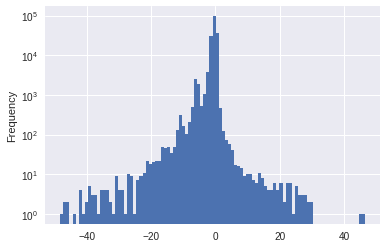

In [8]:
d.loc[ (d.tdiff>-50) & (d.tdiff<50) & (d.fsize>1)].tdiff.plot.hist(bins=100, logy=True)

In [9]:
d.loc[ d.tdiff > 50  ].head(n=100)

,startt,stopt,fsize,frate,ffbtrans,fn,instr,srcquery,trgfs,dmhost,localtrans,srchost,trghost,elap,elapt,tdiff
68281,1.501171e+09,1.501177e+09,0.015225,0.002539,1,e1020-r0149-s00-c00.xtc,mec,daq-mec-dss01-ana,ffb21,psana201,0,daq-mec-dss01,psana201,6140.371094,6086.0,54.371094
94442,1.502143e+09,1.502212e+09,0.159673,0.002344,1,e882-r0052-s03-c00.xtc,sxr,daq-sxr-dss04-ana,ffb11,psana102,0,daq-sxr-dss04,psana102,69762.400716,68993.0,769.400716
94444,1.502143e+09,1.502212e+09,0.159700,0.002344,1,e882-r0052-s05-c00.xtc,sxr,daq-sxr-dss06-ana,ffb11,psana103,0,daq-sxr-dss06,psana103,69773.894857,68992.0,781.894857
94927,1.502218e+09,1.502222e+09,0.012781,0.002734,1,e882-r0060-s01-c00.xtc,sxr,daq-sxr-dss02-ana,ffb11,psana103,0,daq-sxr-dss02,psana103,4786.499721,4707.0,79.499721
95300,1.502241e+09,1.502288e+09,0.050732,0.001074,1,e882-r0073-s03-c00.xtc,sxr,daq-sxr-dss04-ana,ffb11,psana102,0,daq-sxr-dss04,psana102,48359.907670,46849.0,1510.907670
95301,1.502241e+09,1.502288e+09,0.054652,0.001172,1,e882-r0073-s00-c00.xtc,sxr,daq-sxr-dss01-ana,ffb11,psana103,0,daq-sxr-dss01,psana103,47755.758464,46849.0,906.758464
95302,1.502241e+09,1.502288e+09,0.050733,0.001074,1,e882-r0073-s02-c00.xtc,sxr,daq-sxr-dss03-ana,ffb11,psana102,0,daq-sxr-dss03,psana102,48361.409801,46847.0,1514.409801
124288,1.503971e+09,1.503988e+09,91.071210,5.500000,1,e1058-r0003-s00-c00.xtc,sxr,daq-sxr-dss01-ana,ffb11,psana103,0,daq-sxr-dss01,psana103,16955.803383,16877.0,78.803383
124290,1.503971e+09,1.503988e+09,91.053881,5.500000,1,e1058-r0003-s01-c00.xtc,sxr,daq-sxr-dss02-ana,ffb11,psana103,0,daq-sxr-dss02,psana103,16952.577112,16874.0,78.577112
124291,1.503971e+09,1.503988e+09,91.076972,5.500000,1,e1058-r0003-s05-c00.xtc,sxr,daq-sxr-dss06-ana,ffb11,psana103,0,daq-sxr-dss06,psana103,16956.876178,16872.0,84.876178
